In [1]:
import time, sys, os

import matplotlib.pyplot as plt

import numpy as np

import tensorflow as tf

# Prepare the data

In [2]:
num_classes = 10 # 10 classes, digits from 0 to 9

# Data split between train and test sets
path = os.getcwd() + '/datasets/mnist.npz'
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data(path=path)

print('Original x_train shape:', x_train.shape)
print('Original y_train shape:', y_train.shape)
print('Original x_test shape:', x_test.shape)
print('Original y_test shape:', y_test.shape)

# Scale images to the [0, 1] range
x_train = x_train.astype('float32') / 255
x_test  = x_test.astype('float32') / 255

# Reshape
x_train = np.expand_dims(x_train, -1)
x_test  = np.expand_dims(x_test, -1)

input_shape = x_train[0].shape # Input image dimensions

# Convert class vectors to binary class matrices
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test  = tf.keras.utils.to_categorical(y_test, num_classes)

print('\nInput shape: ', input_shape)
print('\nReshaped x_train shape:', x_train.shape)
print('Reshaped y_train shape:', y_train.shape)
print('Reshaped x_test shape:', x_test.shape)
print('Reshaped y_test shape:', y_test.shape)
print('\n', x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print('\nOne hot enconding: {}'.format(y_train[0, :]))

Original x_train shape: (60000, 28, 28)
Original y_train shape: (60000,)
Original x_test shape: (10000, 28, 28)
Original y_test shape: (10000,)

Input shape:  (28, 28, 1)

Reshaped x_train shape: (60000, 28, 28, 1)
Reshaped y_train shape: (60000, 10)
Reshaped x_test shape: (10000, 28, 28, 1)
Reshaped y_test shape: (10000, 10)

 60000 train samples
10000 test samples

One hot enconding: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


# Build the model

In [3]:
model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=input_shape))
# 2 convolutional layers...
model.add(tf.keras.layers.Conv2D(filters=8, kernel_size=(3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dropout(0.5))
# ...and 1 fully connected layers
model.add(tf.keras.layers.Dense(num_classes, activation='softmax')) # One Neuron for each class
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 8)         80        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 16)        1168      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dropout (Dropout)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                4

# Train the model

In [4]:
%time

batch_size = 128
epochs     = 2

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

CPU times: user 5 µs, sys: 1e+03 ns, total: 6 µs
Wall time: 10.3 µs
Train on 54000 samples, validate on 6000 samples
Epoch 1/2
54000/54000 [==============================] - 84s 2ms/sample - loss: 0.7614 - accuracy: 0.7551 - val_loss: 0.1588 - val_accuracy: 0.9613
Epoch 2/2
54000/54000 [==============================] - 79s 1ms/sample - loss: 0.2474 - accuracy: 0.9257 - val_loss: 0.1003 - val_accuracy: 0.9753


# Evaluate the trained model

Test loss: 0.1111799398317933
Test accuracy: 0.9684


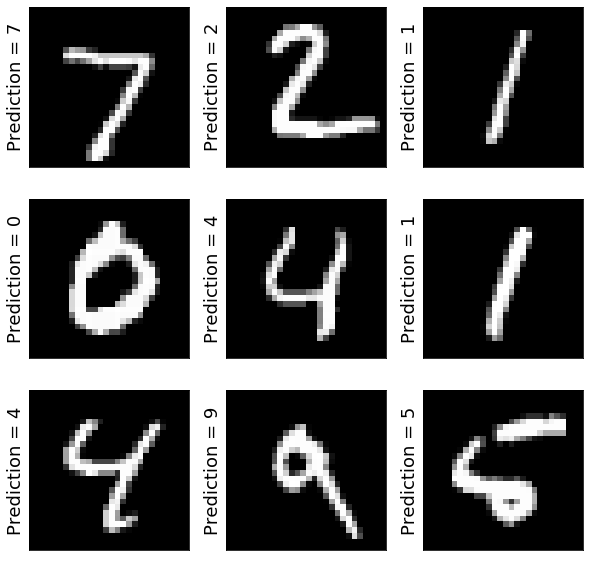

In [5]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

results = model.predict_classes(x_test[:9])

tmp = np.squeeze(x_test, axis=3)

plt.figure(figsize=(10, 10))

for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(tmp[i], cmap='gray')
    plt.gca().get_xaxis().set_ticks([])
    plt.gca().get_yaxis().set_ticks([])
    plt.ylabel('Prediction = %d' % results[i], fontsize=18)